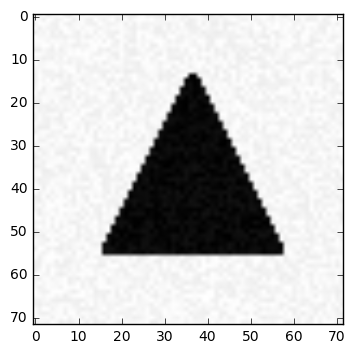

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = keras.utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



In [10]:
# generate a classification dataset of 300 samples with noise = 20
import keras
[X_train, Y_train] = generate_dataset_classification(300,20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [11]:
# creating a sequential model instance
from keras.models import Sequential
model1_adam = Sequential()

# defining the Network - using 
from keras.layers import Dense, Activation, Dropout
nb_neurons = 3
model1_adam.add(Dense(nb_neurons,kernel_initializer= 'uniform', activation ='softmax' ,input_shape=(X_train.shape[1],)))

model1_adam.compile(loss='categorical_crossentropy', optimizer='Adam')



In [12]:
# reshaping Y_train
Y_train = keras.utils.to_categorical(Y_train,3)
Y_train.shape


(300, 3)

In [13]:
# Fitting the model
model1_adam.fit(X_train, Y_train, batch_size = 32, epochs = 10, verbose=1)

Epoch 1/10
300/300 [==============================] - 0s 2ms/step - loss: 1.6395
Epoch 2/10
300/300 [==============================] - 0s 167us/step - loss: 0.7608
Epoch 3/10
300/300 [==============================] - 0s 163us/step - loss: 0.5140
Epoch 4/10
300/300 [==============================] - 0s 167us/step - loss: 0.4887
Epoch 5/10
300/300 [==============================] - 0s 173us/step - loss: 0.3983
Epoch 6/10
300/300 [==============================] - 0s 167us/step - loss: 0.2816
Epoch 7/10
300/300 [==============================] - 0s 153us/step - loss: 0.2120
Epoch 8/10
300/300 [==============================] - 0s 177us/step - loss: 0.2004
Epoch 9/10
300/300 [==============================] - 0s 170us/step - loss: 0.1957
Epoch 10/10
300/300 [==============================] - 0s 177us/step - loss: 0.1402


In [14]:
# Checking the classifier
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0]) 
model1_adam.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [15]:
# creating a sequential model instance
model1_sgd = Sequential()

# defining the Network 
from keras.layers import Dense, Activation, Dropout
nb_neurons = 3
model1_sgd.add(Dense(nb_neurons,kernel_initializer= 'uniform', activation ='softmax' ,input_shape=(X_train.shape[1],)))

# defining the optimization method
from keras.optimizers import SGD
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1_sgd.compile(loss='mean_squared_error', optimizer='SGD')



In [16]:
# Fitting the model
model1_sgd.fit(X_train, Y_train, epochs=10, batch_size=32, verbose =1)

Epoch 1/10
300/300 [==============================] - 0s 720us/step - loss: 0.2632
Epoch 2/10
300/300 [==============================] - 0s 177us/step - loss: 0.2004
Epoch 3/10
300/300 [==============================] - 0s 177us/step - loss: 0.2044
Epoch 4/10
300/300 [==============================] - 0s 163us/step - loss: 0.1800
Epoch 5/10
300/300 [==============================] - 0s 173us/step - loss: 0.1951
Epoch 6/10
300/300 [==============================] - 0s 187us/step - loss: 0.1673
Epoch 7/10
300/300 [==============================] - 0s 157us/step - loss: 0.1504
Epoch 8/10
300/300 [==============================] - 0s 147us/step - loss: 0.1175
Epoch 9/10
300/300 [==============================] - 0s 117us/step - loss: 0.1022
Epoch 10/10
300/300 [==============================] - 0s 120us/step - loss: 0.1159


In [17]:
# Checking the classifier with the same X_test
model1_sgd.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [18]:
# getting the weights 
print(model1_adam.get_weights())

[array([[-0.00878484, -0.00313557,  0.01772291],
       [ 0.04564017, -0.04564027, -0.01526196],
       [ 0.04447589,  0.03108003, -0.03259524],
       ...,
       [ 0.01341348, -0.02011886, -0.03976812],
       [ 0.03101598, -0.02493366,  0.00602819],
       [-0.03610172,  0.03831099,  0.00256779]], dtype=float32), array([ 0.00149575,  0.00059463, -0.00100787], dtype=float32)]


In [19]:
# getting the weights of the classifier - Adam
weights_adam = model1_adam.get_weights()[0]
weights_adam_1=weights_adam[:,0]
weights_adam_2=weights_adam[:,1]
weights_adam_3=weights_adam[:,2]




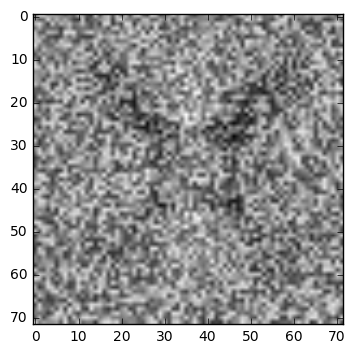

In [20]:
plt.imshow(weights_adam_1.reshape(IMAGE_SIZE, IMAGE_SIZE),  cmap='gray')

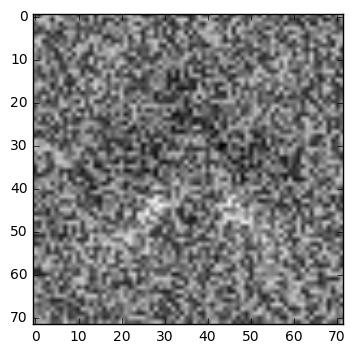

In [21]:
plt.imshow(weights_adam_2.reshape(IMAGE_SIZE, IMAGE_SIZE),  cmap='gray')

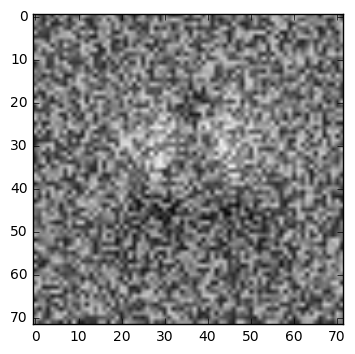

In [27]:
plt.imshow(weights_adam_3.reshape(IMAGE_SIZE, IMAGE_SIZE),  cmap='gray')

In [23]:
# Checking the output of get_weights()
model1_sgd.get_weights()

[array([[-0.02450132, -0.00948322,  0.02912655],
        [ 0.02291202,  0.02596355,  0.01606022],
        [-0.01398344,  0.03337693,  0.0401211 ],
        ...,
        [-0.02249731,  0.02573847, -0.02507225],
        [ 0.04592968,  0.00842645,  0.02794353],
        [-0.03207521,  0.03319065, -0.00243724]], dtype=float32),
 array([ 1.2615124e-03,  2.9292787e-06, -1.2644412e-03], dtype=float32)]

In [25]:
# getting the weights of the classifier - SGD
weights_sgd = model1_sgd.get_weights()[0]
weights_sgd_1=weights_sgd[:,0]
weights_sgd_2=weights_sgd[:,1]
weights_sgd_3=weights_sgd[:,2]



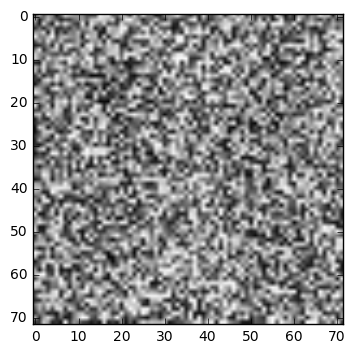

In [28]:
# visualizing the content of the first column
plt.imshow(weights_sgd_1.reshape(IMAGE_SIZE, IMAGE_SIZE),  cmap='gray')

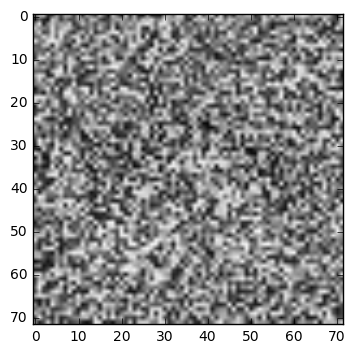

In [29]:
# visualizing the content of the 2nd column
plt.imshow(weights_sgd_2.reshape(IMAGE_SIZE, IMAGE_SIZE),  cmap='gray')

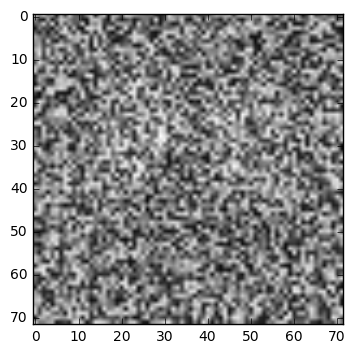

In [30]:
# visualizing the content of the 3rd column
plt.imshow(weights_sgd_3.reshape(IMAGE_SIZE, IMAGE_SIZE),  cmap='gray')

In [31]:
# Generating a new dataset
[X_train_2, Y_train_2] = generate_dataset_classification(300,20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [42]:
# retraining the classifier with metrics = [accuracy] parameter
from keras.models import Sequential
model2_adam = Sequential()
from keras.layers import Dense, Activation, Dropout
nb_neurons = 3
model2_adam.add(Dense(nb_neurons,kernel_initializer= 'uniform', activation ='relu' ,input_shape=(X_train_2.shape[1],)))
model2_adam.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=["accuracy"])
Y_train_2 = keras.utils.to_categorical(Y_train_2,3)
model2_adam.fit(X_train_2, Y_train_2, batch_size = 32, epochs = 10, verbose=1)






Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 1.5755 - acc: 0.3033
Epoch 2/10
300/300 [==============================] - 0s 217us/step - loss: 1.0892 - acc: 0.3800
Epoch 3/10
300/300 [==============================] - 0s 233us/step - loss: 1.0863 - acc: 0.3800
Epoch 4/10
300/300 [==============================] - 0s 170us/step - loss: 1.0852 - acc: 0.3800
Epoch 5/10
300/300 [==============================] - 0s 187us/step - loss: 1.0807 - acc: 0.3800
Epoch 6/10
300/300 [==============================] - 0s 197us/step - loss: 1.0785 - acc: 0.3900
Epoch 7/10
300/300 [==============================] - 0s 157us/step - loss: 1.0748 - acc: 0.3933
Epoch 8/10
300/300 [==============================] - 0s 157us/step - loss: 1.0727 - acc: 0.4067
Epoch 9/10
300/300 [==============================] - 0s 163us/step - loss: 1.0697 - acc: 0.4500
Epoch 10/10
300/300 [==============================] - 0s 160us/step - loss: 1.0697 - acc: 0.4267


In [33]:
# Generating test set
[X_test_2, Y_test_2] = generate_dataset_classification(300,20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [34]:
# reshaping Y_test_2
Y_test_2 = keras.utils.to_categorical(Y_test_2,3)
#Y_test_2.shape
#X_test_2.shape

In [43]:
# evaluating the model using test dataset
model2_adam.evaluate(X_test_2,Y_test_2)


300/300 [==============================] - 0s 1ms/step


[1.072067170937856, 0.31333333293596904]

In [44]:
# priting the loss function
print('loss {0}'.format(model2_adam.evaluate(X_test_2,
                                         Y_test_2)[0]))

300/300 [==============================] - 0s 150us/step
loss 1.072067170937856


In [45]:
# generating a new training dataset
[X_train_3, Y_train_3] = generate_dataset_classification(300,20,True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [46]:
from keras.layers import Conv2D, MaxPooling2D

# creating a sequential model instance
from keras.models import Sequential
model_3 = Sequential()

# reshaping the training data
X_train_3 = X_train_3.reshape(X_train_3.shape[0],72,72,1)
Y_train_3 = keras.utils.to_categorical(Y_train_3,3)

print(X_train_3.shape)


(300, 72, 72, 1)


In [47]:
print(Y_train_3.shape)

(300, 3)


In [62]:
from keras.layers import Flatten
nb_neurons = 16

# defining the Network
model_3 = Sequential()
model_3.add(Conv2D(nb_neurons, kernel_size=(5, 5), activation='relu', input_shape=(72,72,1)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(100, activation='sigmoid'))
model_3.add(Dense(3, activation='softmax'))



In [65]:
# Fitting the model
model_3.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=["accuracy"])
model_3.fit(X_train_3, Y_train_3, batch_size=12, epochs=9)

Epoch 1/9
300/300 [==============================] - 3s 11ms/step - loss: 0.1476 - acc: 0.9733
Epoch 2/9
300/300 [==============================] - 2s 6ms/step - loss: 0.0755 - acc: 1.0000
Epoch 3/9
300/300 [==============================] - 2s 6ms/step - loss: 0.0470 - acc: 1.0000
Epoch 4/9
300/300 [==============================] - 2s 6ms/step - loss: 0.0326 - acc: 1.0000
Epoch 5/9
300/300 [==============================] - 2s 6ms/step - loss: 0.0265 - acc: 1.0000
Epoch 6/9
300/300 [==============================] - 2s 7ms/step - loss: 0.0216 - acc: 1.0000
Epoch 7/9
300/300 [==============================] - 2s 7ms/step - loss: 0.0146 - acc: 1.0000
Epoch 8/9
300/300 [==============================] - 2s 7ms/step - loss: 0.0106 - acc: 1.0000
Epoch 9/9
300/300 [==============================] - 2s 7ms/step - loss: 0.0085 - acc: 1.0000


In [51]:
# generating test set 
[X_test_3, Y_test_3] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [52]:
# reshaping test data
X_test_3 = X_test_3.reshape(X_test_3.shape[0],72,72,1)


In [53]:
Y_test_3.shape

(300, 3)

In [54]:
X_test_3.shape

(300, 72, 72, 1)

In [66]:
model_3.evaluate(X_test_3,Y_test_3)
print('loss {0}'.format(model_3.evaluate(X_test_3,Y_test_3)))

300/300 [==============================] - 0s 2ms/step
loss [0.9770879872639974, 0.7199999992052714]


In [67]:
# genearting new training set
[X_train_4,Y_train_4] = generate_dataset_regression(300,20)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


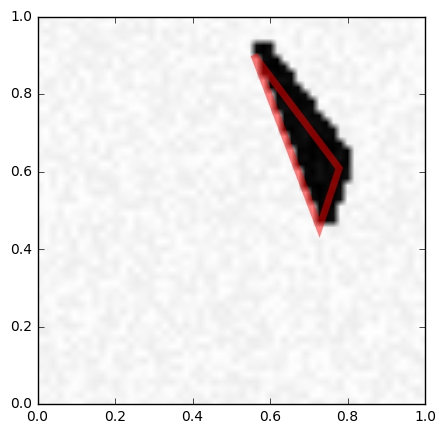

In [68]:
# visualizing the tarining set
visualize_prediction(X_train_4[0], Y_train_4[0])

In [69]:
# generating validation dataset
[X_val_4, Y_val_4] = generate_dataset_regression(300, 20)



Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [70]:
print(Y_train_4.shape)



(300, 6)


In [71]:
print(X_train_4.shape)



(300, 5184)


In [72]:
print(Y_val_4.shape)



(300, 6)


In [73]:
print(X_val_4.shape)



(300, 5184)


In [74]:
# building the regression model
from keras.layers import BatchNormalization

model_4 = Sequential()
model_4.add(Dense(units=128,kernel_initializer= 'uniform',activation="relu", input_shape=(5184,)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))
model_4.add(Dense(units=6,kernel_initializer= 'uniform'))
model_4.add(BatchNormalization())
model_4.compile(optimizer="Adam", loss='mse', metrics= ["mae"])
result=model_4.fit(X_train_4,Y_train_4,validation_data=(X_val_4,Y_val_4),batch_size=32, epochs=300)

Train on 300 samples, validate on 300 samples
Epoch 1/300
300/300 [==============================] - 4s 13ms/step - loss: 1.1345 - mean_absolute_error: 0.8407 - val_loss: 22.7883 - val_mean_absolute_error: 4.2134
Epoch 2/300
300/300 [==============================] - 0s 1ms/step - loss: 0.9964 - mean_absolute_error: 0.7866 - val_loss: 6.9671 - val_mean_absolute_error: 2.2170
Epoch 3/300
300/300 [==============================] - 0s 946us/step - loss: 0.9479 - mean_absolute_error: 0.7662 - val_loss: 3.4009 - val_mean_absolute_error: 1.5579
Epoch 4/300
300/300 [==============================] - 0s 976us/step - loss: 0.9082 - mean_absolute_error: 0.7524 - val_loss: 3.0318 - val_mean_absolute_error: 1.4603
Epoch 5/300
300/300 [==============================] - 0s 973us/step - loss: 0.8689 - mean_absolute_error: 0.7289 - val_loss: 1.3819 - val_mean_absolute_error: 0.9595
Epoch 6/300
300/300 [==============================] - 0s 1ms/step - loss: 0.8131 - mean_absolute_error: 0.7125 - val_los

In [75]:
[X_test_4, Y_test_4] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


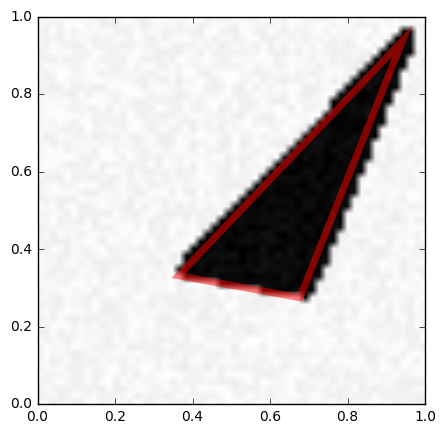

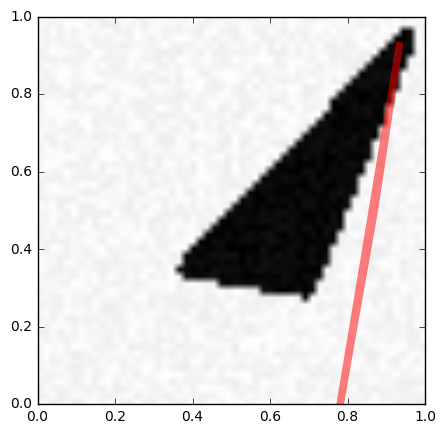

In [77]:
Y_pred_4 = model_4.predict(X_test_4)
visualize_prediction(X_test_4[0], Y_test_4[0])
visualize_prediction(X_test_4[0], Y_pred_4[0])

In [81]:
# evaluating the model
model_4.evaluate(X_test_4, Y_test_4)

300/300 [==============================] - 0s 270us/step


[0.1196802181005478, 0.27782184918721514]

In [82]:
# reshaping the data
X_train_4 = X_train_4.reshape([-1, 72,72,1])
X_test_4 = X_test_4.reshape([-1, 72,72,1])

In [104]:
# building the model
model5_CNN= Sequential()
model5_CNN.add(Conv2D(8, (5, 5))) 
model5_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model5_CNN.add(Conv2D(16, (5, 5))) 
model5_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model5_CNN.add(Conv2D(32, (5, 5))) 
model5_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model5_CNN.add(Flatten()) 
model5_CNN.add(Dense(6, ))
model5_CNN.compile( loss='mse', optimizer='rmsprop',metrics=['mae'])

In [107]:
# Fitting the model
model5_CNN.fit(X_train_4,Y_train_4,batch_size=32, epochs=20)

Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.1500
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0301 - mean_absolute_error: 0.1410
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0408 - mean_absolute_error: 0.1635
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0285 - mean_absolute_error: 0.1360
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0286 - mean_absolute_error: 0.1355
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.1475
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.1171
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.1407
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.1086
E

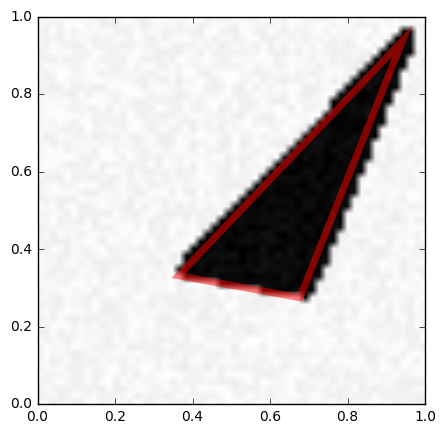

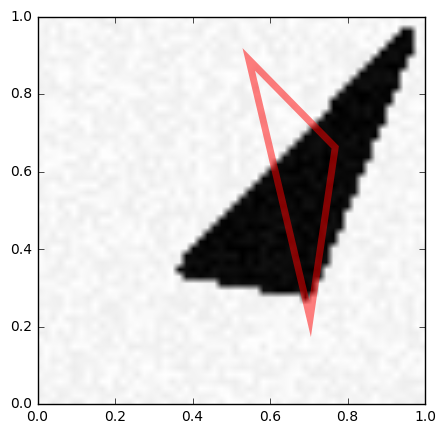

In [108]:
# Visualizing the prediction
Y_pred_4=model5_CNN.predict(X_test_4)
visualize_prediction(X_test_4[0], Y_test_4[0])
visualize_prediction(X_test_4[0], Y_pred_4[0])

In [109]:
# evaluating the model
model5_CNN.evaluate(X_test_4, Y_test_4)

300/300 [==============================] - 1s 2ms/step


[0.09136918952067694, 0.24365928252538047]

In [110]:
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise, imdata

def generate_a_rectangle_noise(free_location=False):

    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    
    # generating noise randomly
    noise = np.random.randint(0,100) 
    
    return generate_a_drawing_noise(figsize, U, V, noise)

def generate_a_disk_noise(free_location=False):
    
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    # generating noise randomly
    noise = np.random.randint(0,100)  
    return generate_a_drawing_noise(figsize, U, V, noise)
  
def generate_a_triangle_noise(free_location=False):

    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    
    # genearting noise randomly
    noise = np.random.randint(0,100) 
    
    imdata = generate_a_drawing_noise(figsize, U, V, noise)
    
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_noise(nb_samples, free_location=False):
    # Getting im_size:
   
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,2,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle_noise(free_location)
        elif category == 1: 
            X[i] = generate_a_disk_noise(free_location)
        else:
            [X[i], V] = generate_a_triangle_noise(free_location)
        Y[i] = category
    
    # generating noise randomly
    noise = np.random.randint(0,100)  
    
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [111]:
Training_data_5, shape =generate_dataset_noise(500)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [112]:
# getting and reshape the training data
#prepare training set and reshape
X_train_5 = Training_data_5[:,0]
Y_train_5 = Training_data_5[:,1]

X_train_5 = X_train_5.reshape(500,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train_5 = Y_train_5.reshape(500,IMAGE_SIZE,IMAGE_SIZE,1)

In [116]:
# building the model
from keras.models import Model, Input
from keras.layers import UpSampling2D 

inp = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

nb_neurons = 32

x=Conv2D(nb_neurons, (3, 3), activation='relu', padding='same')(inp)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(nb_neurons, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(nb_neurons, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(nb_neurons, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
model_denoiser = Model(inp, output)
model_denoiser.compile(optimizer="adam", loss='binary_crossentropy')
model_denoiser.fit(X_train_5, Y_train_5, epochs=12, batch_size=128,validation_split=0.2, shuffle=True, verbose=1)

Train on 400 samples, validate on 100 samples
Epoch 1/12
400/400 [==============================] - 36s 89ms/step - loss: 0.6586 - val_loss: 0.6138
Epoch 2/12
400/400 [==============================] - 10s 25ms/step - loss: 0.6158 - val_loss: 0.6133
Epoch 3/12
400/400 [==============================] - 9s 23ms/step - loss: 0.6080 - val_loss: 0.6057
Epoch 4/12
400/400 [==============================] - 9s 24ms/step - loss: 0.6027 - val_loss: 0.5949
Epoch 5/12
400/400 [==============================] - 10s 24ms/step - loss: 0.5910 - val_loss: 0.5810
Epoch 6/12
400/400 [==============================] - 10s 24ms/step - loss: 0.5767 - val_loss: 0.5620
Epoch 7/12
400/400 [==============================] - 10s 24ms/step - loss: 0.5562 - val_loss: 0.5416
Epoch 8/12
400/400 [==============================] - 10s 24ms/step - loss: 0.5369 - val_loss: 0.5285
Epoch 9/12
400/400 [==============================] - 9s 24ms/step - loss: 0.5263 - val_loss: 0.5238
Epoch 10/12
400/400 [==================

In [117]:
# generating test data
Test_data, _ = generate_dataset_noise(15, 25)

Creating data:
0
10


In [119]:
#reshaping the data
X_test_5 = Test_data[:,0]
Y_test_5 = Test_data[:,1]
X_test_5 = X_test_5.reshape(15,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test_5 = Y_test_5.reshape(15,IMAGE_SIZE,IMAGE_SIZE,1)


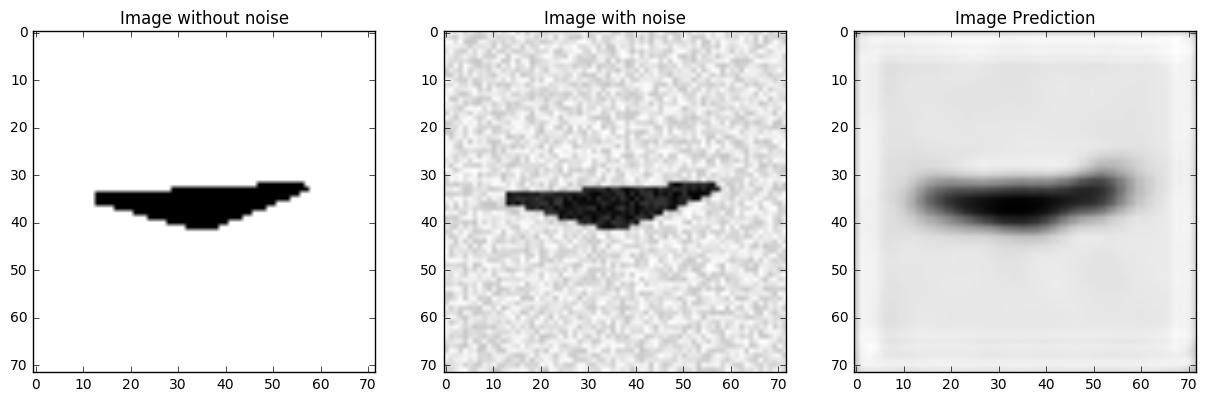

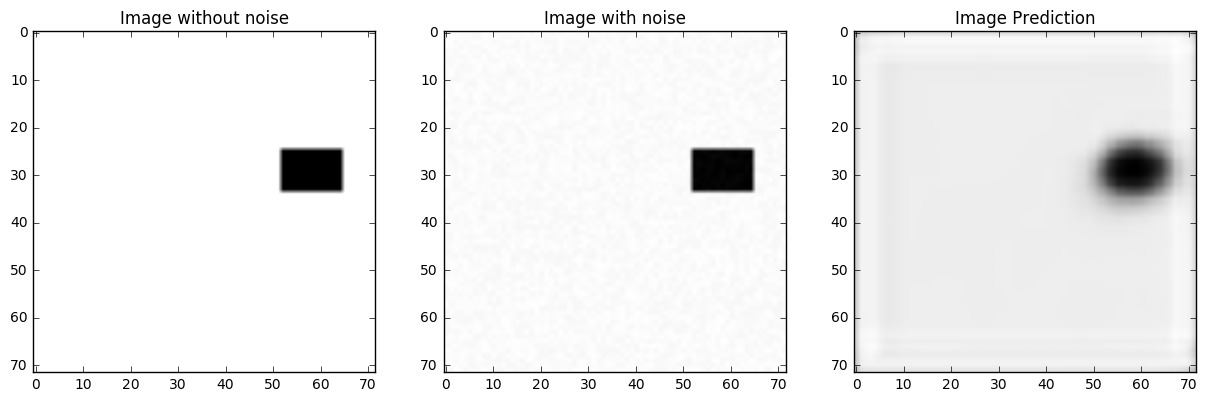

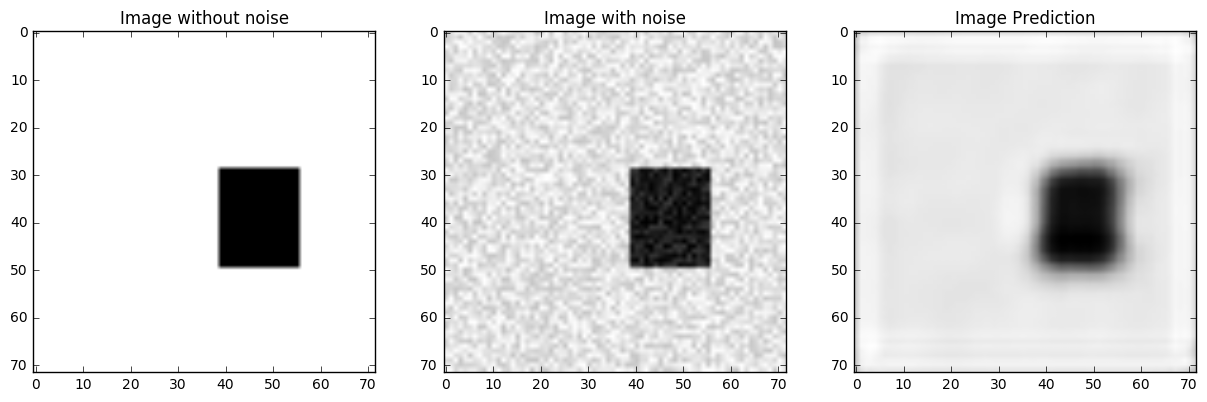

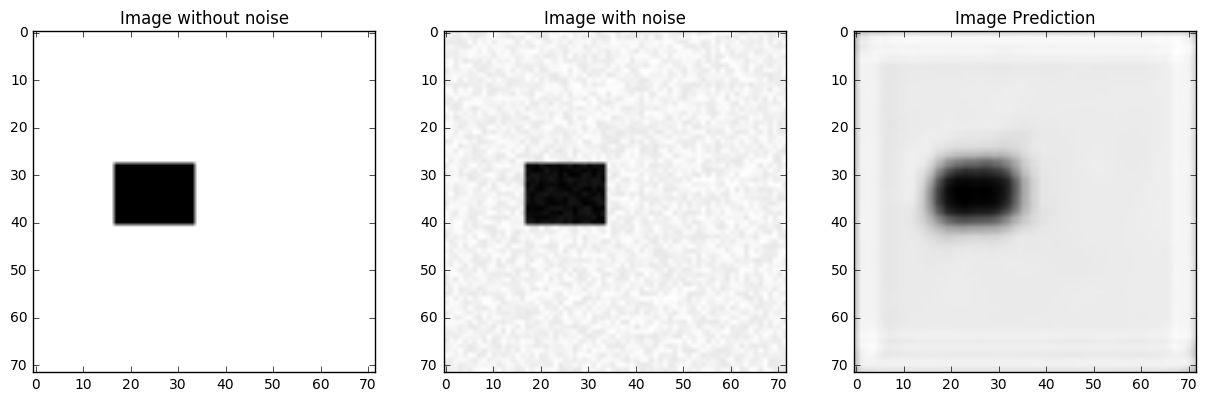

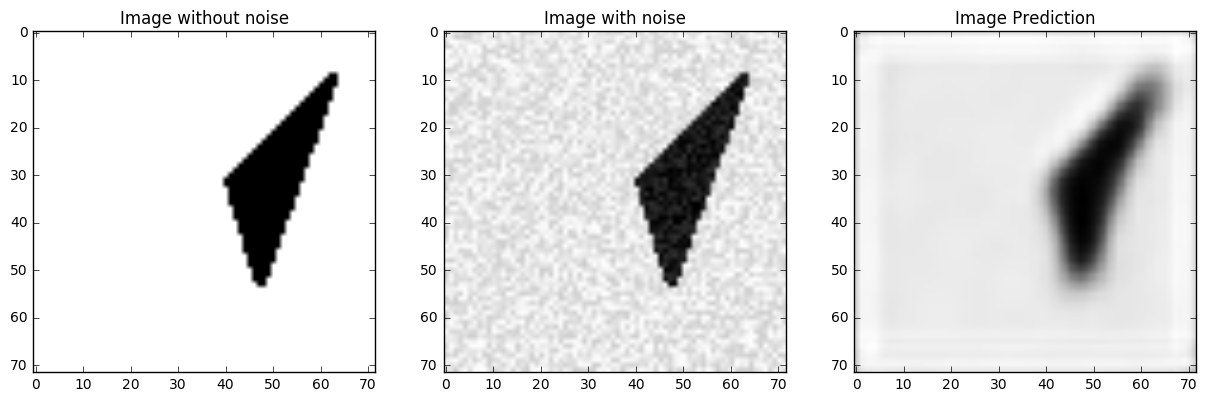

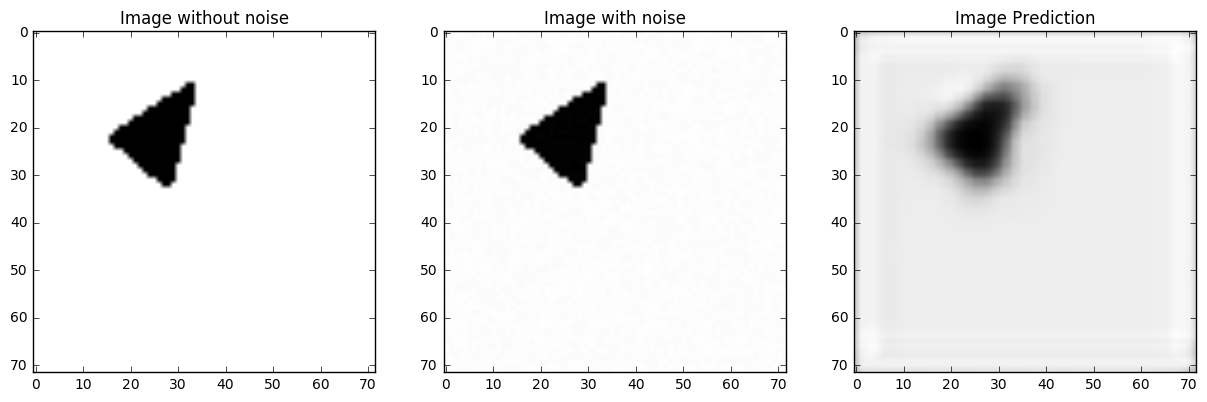

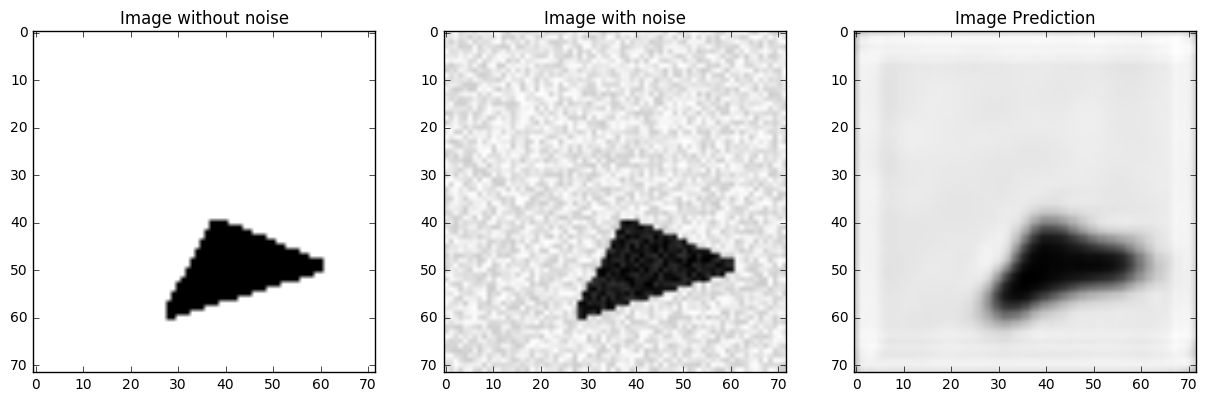

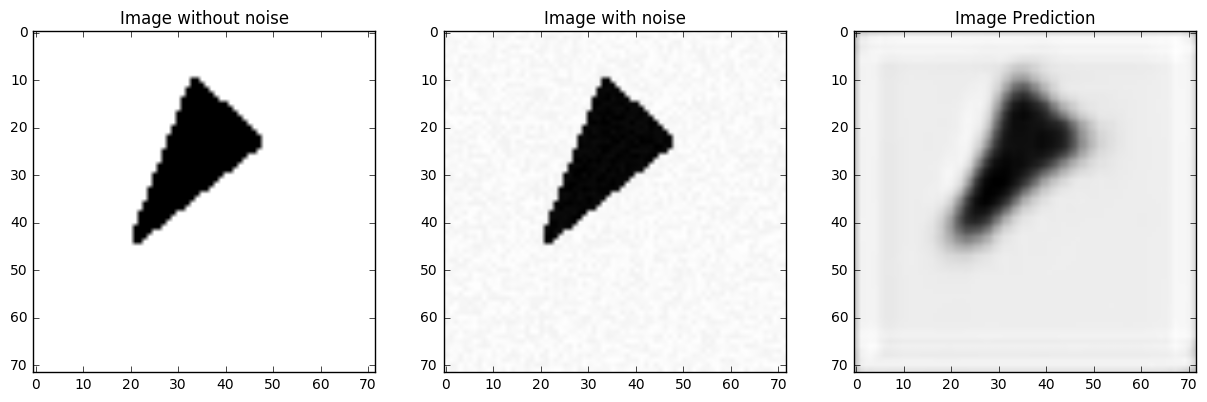

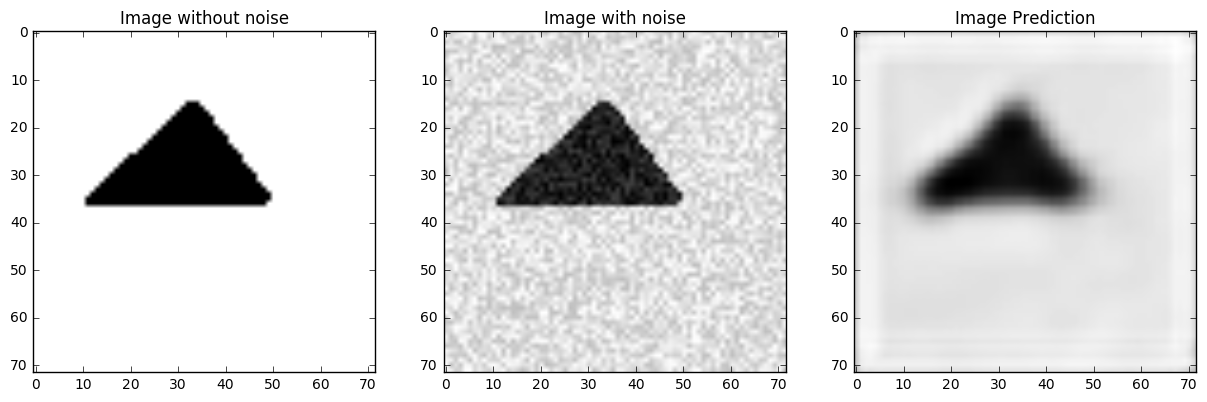

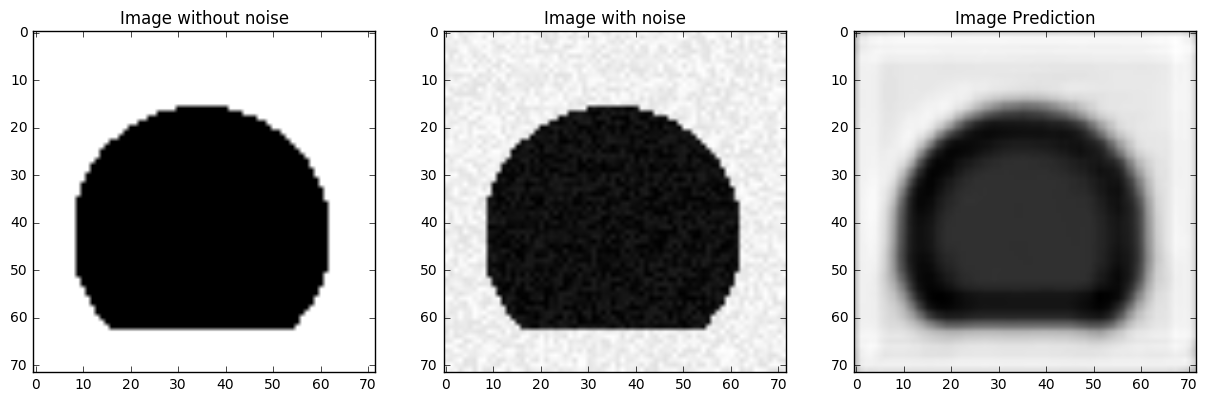

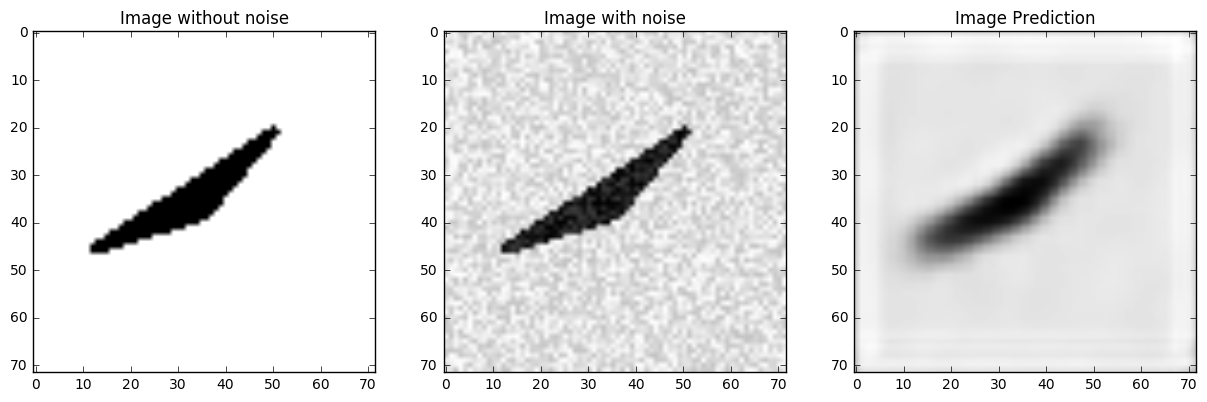

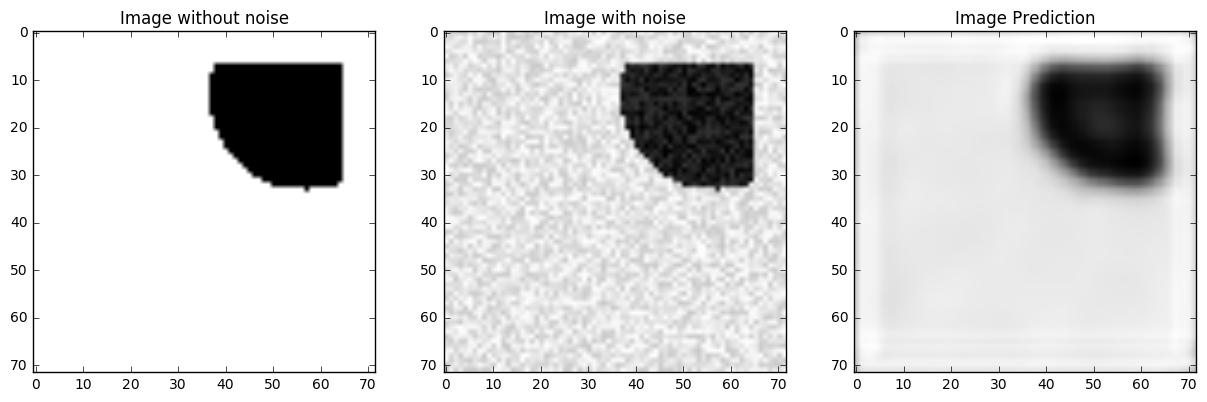

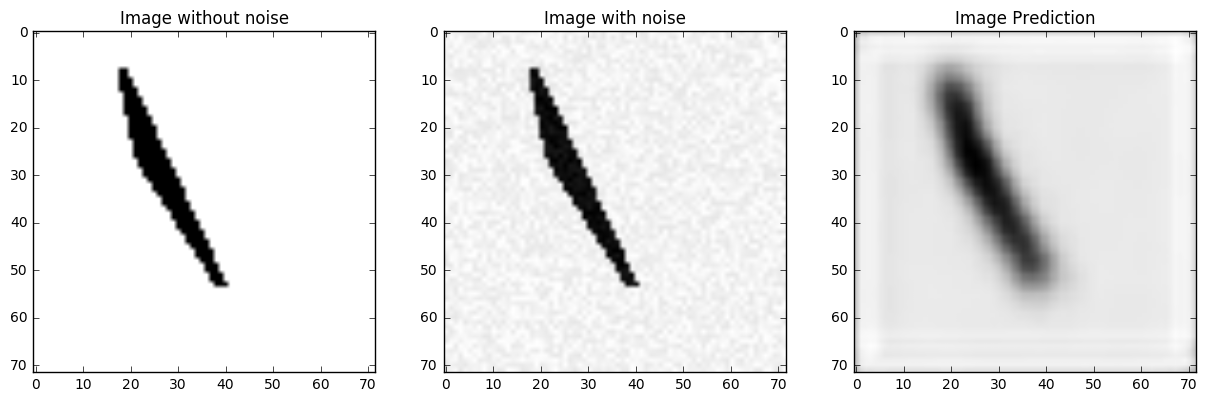

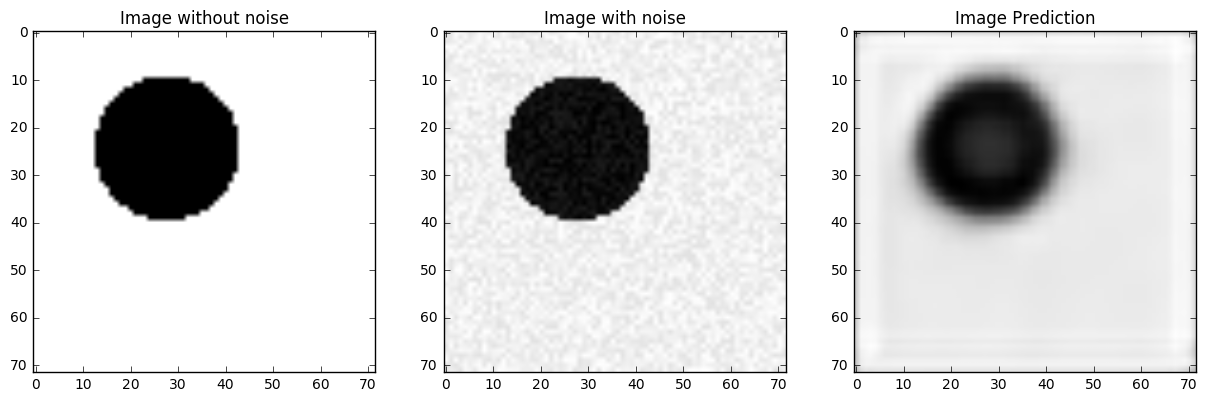

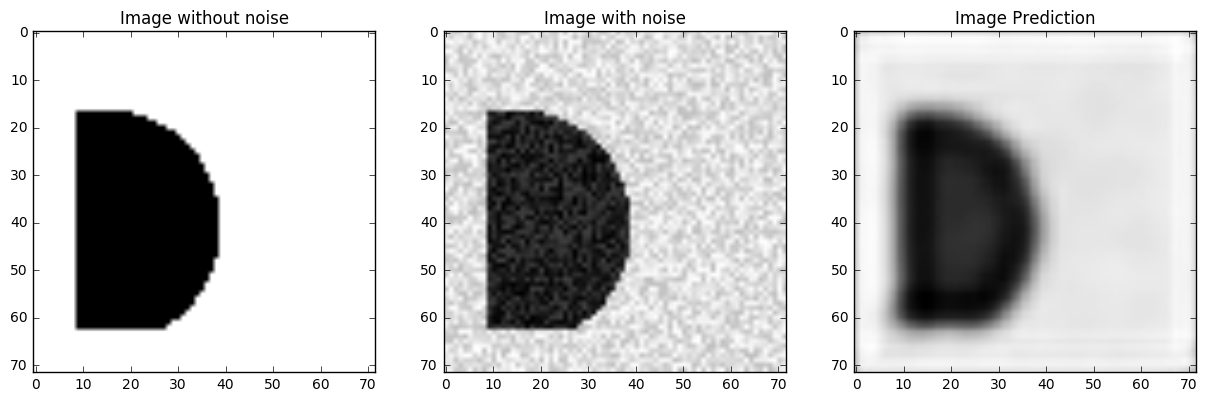

In [131]:
# plotting the results
for i in range(15):
  fig = plt.figure(figsize = (15,30))
    
  plt1 = plt.subplot(1, 3, 1)
  plt.imshow(Y_test_5[i].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Image without noise")
    
  plt2 = plt.subplot(1, 3, 2)
  plt.imshow(X_test_5[i].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Image with noise")

  plt3 = plt.subplot(1, 3, 3)
  plt.imshow((model_denoiser.predict(X_test_5[i].reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))).reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
  plt.title("Image Prediction")

